In [1]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from scipy import stats
from fitter import Fitter
import random

In [2]:
df = pd.read_csv('engine_system.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head(10)      #reshaped and restructured data with only engine readings (ffill method)

,61443-91,61444-512,61444-513
0,58.8,43.0,45.0
1,0.0,0.0,0.0
2,39.2,39.0,37.0
3,47.6,0.0,38.0
4,53.6,15.0,15.0
5,0.0,0.0,3.0
6,66.0,38.0,37.0
7,65.2,7.0,6.0
8,52.4,44.0,37.0
9,66.8,0.0,0.0


In [4]:
def moving_avg(x, N=1000):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

In [5]:
df.describe()

,61443-91,61444-512,61444-513
count,126729.000000,126729.000000,126729.000000
mean,26.590432,21.989182,19.757104
std,31.387741,25.932387,22.410236
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,7.000000,6.000000
75%,54.800000,43.000000,36.000000
max,100.000000,99.000000,95.000000


Checking Data Distribution for Synthetic Data generation

2024-04-23 13:38:43.151 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 120 seconds)
2024-04-23 13:38:44.055 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.006949)
2024-04-23 13:38:58.869 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.001382)
2024-04-23 13:39:00.390 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=0.001415)
2024-04-23 13:39:10.193 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cosine distribution with error=0.001174)
2024-04-23 13:39:21.973 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dgamma distribution with error=0.001096)
2024-04-23 13:39:23.551 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dweibull distribution with error=0.001128)
2024-04-23 13:39:29.703 | INFO     | fitter.fitter:_fit_single_distribution:337 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.002955,924.232433,942.329223,0.145249,0.143257,0.0
truncexpon,0.003868,929.725435,956.870619,0.195125,0.220254,0.0
powerlaw,0.002604,931.135107,958.280291,0.123838,0.119838,0.0
semicircular,0.001819,934.120575,952.217364,0.084714,0.113880,0.0
argus,0.001618,946.185128,973.330312,0.073866,0.100378,0.0


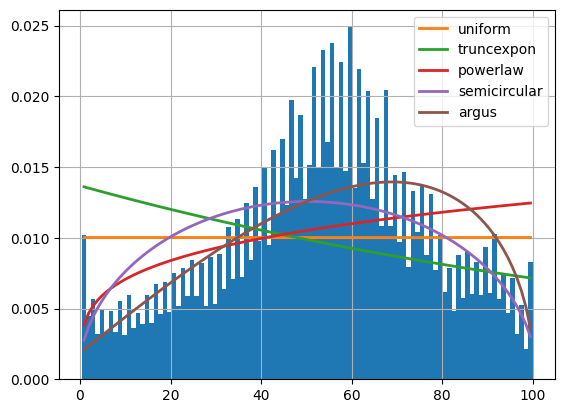

In [11]:
f = Fitter(df.loc[df['61443-91'] != 0.0, '61443-91'], timeout=120)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary(method='aic')

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.002955,924.232433,942.329223,0.145249,0.143257,0.0
truncexpon,0.003868,929.725435,956.870619,0.195125,0.220254,0.0
powerlaw,0.002604,931.135107,958.280291,0.123838,0.119838,0.0
semicircular,0.001819,934.120575,952.217364,0.084714,0.113880,0.0
argus,0.001618,946.185128,973.330312,0.073866,0.100378,0.0


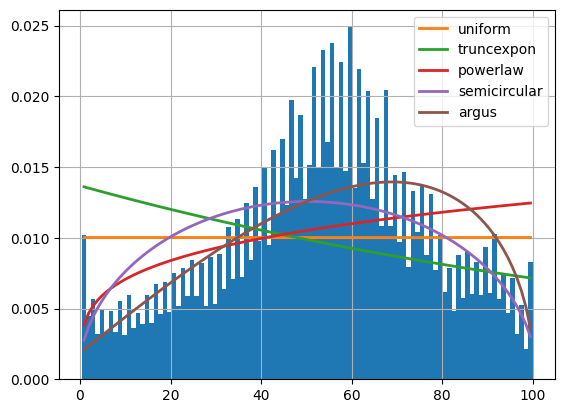

In [33]:
f.summary(method='aic')

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
weibull_min,0.000957,971.099223,998.244408,0.051907,0.021127,8.483969e-25
loggamma,0.000943,974.487796,1001.632981,0.052072,0.021140,7.939946e-25
skewnorm,0.000938,974.786649,1001.931833,0.051819,0.022272,1.641398e-27
genlogistic,0.000925,985.486704,1012.631888,0.054057,0.025953,3.317192e-37
logistic,0.000969,983.163780,1001.260569,0.056211,0.032588,2.043482e-58


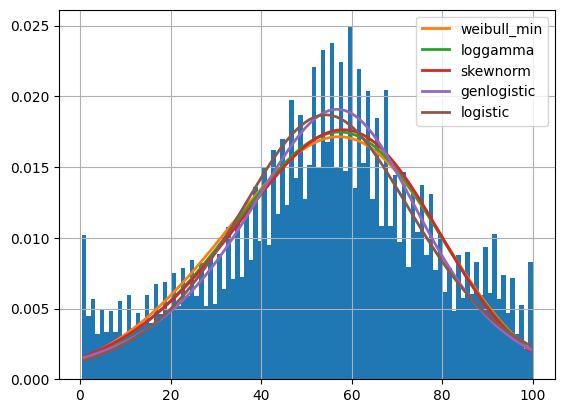

In [34]:
f.summary(method='ks_statistic')

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.002955,924.232433,942.329223,0.145249,0.143257,0.0
semicircular,0.001819,934.120575,952.217364,0.084714,0.113880,0.0
truncexpon,0.003868,929.725435,956.870619,0.195125,0.220254,0.0
powerlaw,0.002604,931.135107,958.280291,0.123838,0.119838,0.0
anglit,0.001382,947.992902,966.089692,0.066391,0.086003,0.0


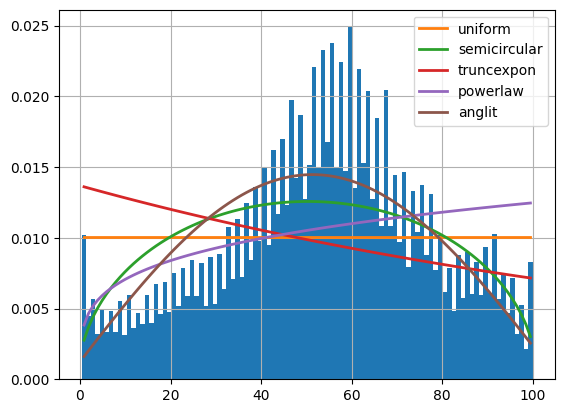

In [35]:
f.summary(method='bic')

In [12]:
print("Metric=AIC: " + str(f.get_best(method='aic')))
print("Metric=KS statistic: " + str(f.get_best(method='ks_statistic')))
print("Metric=sse: " + str(f.get_best(method='sumsquare_error')))

Metric=AIC: {'uniform': {'loc': 0.4, 'scale': 99.6}}
Metric=KS statistic: {'weibull_min': {'c': 4.57668272551534, 'loc': -38.33756332153678, 'scale': 100.7829601584528}}
Metric=sse: {'genlogistic': {'c': 0.7224547319484056, 'loc': 60.60991437363757, 'scale': 11.733752133625206}}


In [14]:
from scipy.stats import genlogistic, uniform, weibull_min 
samples = genlogistic.rvs(0.7224547319484056, loc=60.60991437363757, scale=11.733752133625206, size=len(df['61443-91']))
samples1 = uniform.rvs(loc=0.0, scale=100.0, size=len(df['61443-91']))
samples2 = weibull_min.rvs(4.57668272551534, loc=-38.33756332153678, scale=100.7829601584528, size=len(df['61443-91']))

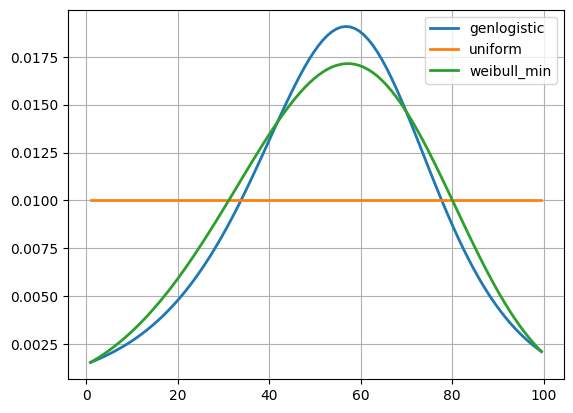

In [15]:
f.plot_pdf(['genlogistic', 'uniform', 'weibull_min'])

In [16]:
distributions = [
    stats.norm,     # Normal distribution
    stats.expon,    # Exponential distribution
    stats.gamma,    # Gamma distribution
    stats.loggamma,
    stats.dweibull,
    stats.weibull_max,
    stats.weibull_min,
    stats.beta,
    stats.uniform
]

# Fit data to each distribution and calculate the AIC for comparison
best_distribution = None
best_params = {}
best_aic = np.inf

for distribution in distributions:
    # Fit the data to the distribution
    params = distribution.fit(df.loc[df['61443-91'] != 0, '61443-91'])
    
    # Calculate the AIC (Akaike Information Criterion)
    _, aic = stats.kstest(df.loc[df['61443-91'] != 0, '61443-91'], distribution.cdf, args=params)
    
    # Update the best distribution if the current one has a lower AIC
    if aic < best_aic:
        best_distribution = distribution
        best_params = params
        best_aic = aic

print("Best fitting distribution:", best_distribution.name)
print("Parameters:", best_params)

Best fitting distribution: expon
Parameters: (0.4, 53.22218226373661)


In [28]:
# Fit the data to a normal distribution
mu, std = stats.expon.fit(df.loc[df['61443-91'] != 0, '61443-91'])
print(mu, std)

0.4 53.22218226373661


Comparing samples from the top chosen distributions to the original data

In [18]:
samples = pd.Series(samples)
samples1 = pd.Series(samples1)
samples2 = pd.Series(samples2)

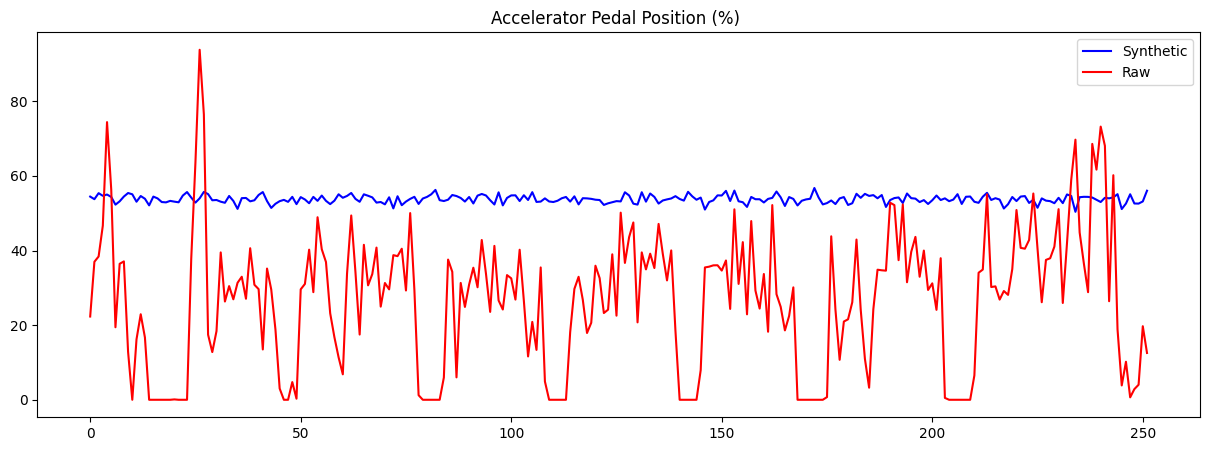

In [19]:
w=500   #comparison with genlogistic
plt.figure(figsize=(15,5))
v1 = samples.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

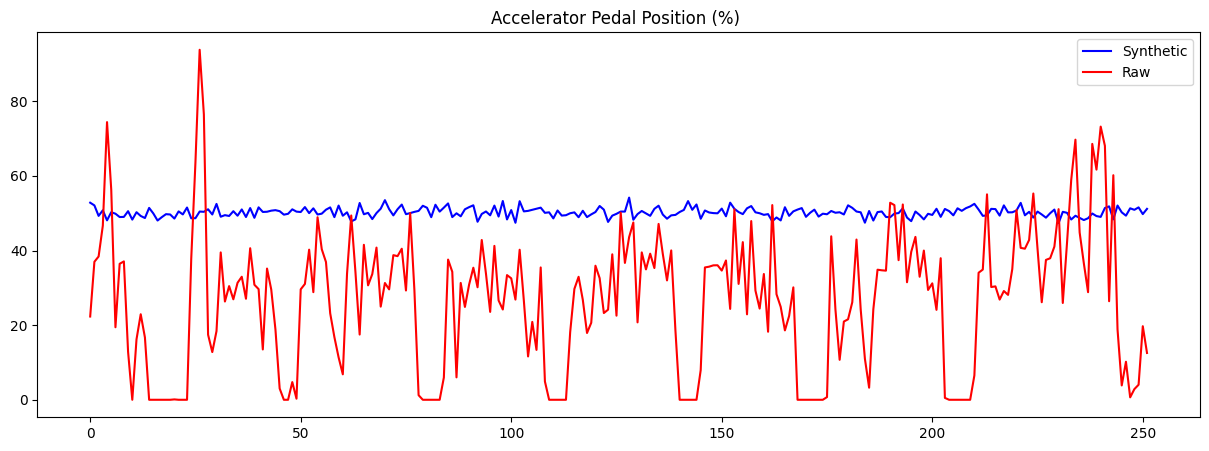

In [20]:
w=500   #comparison with uniform
plt.figure(figsize=(15,5))
v1 = samples1.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

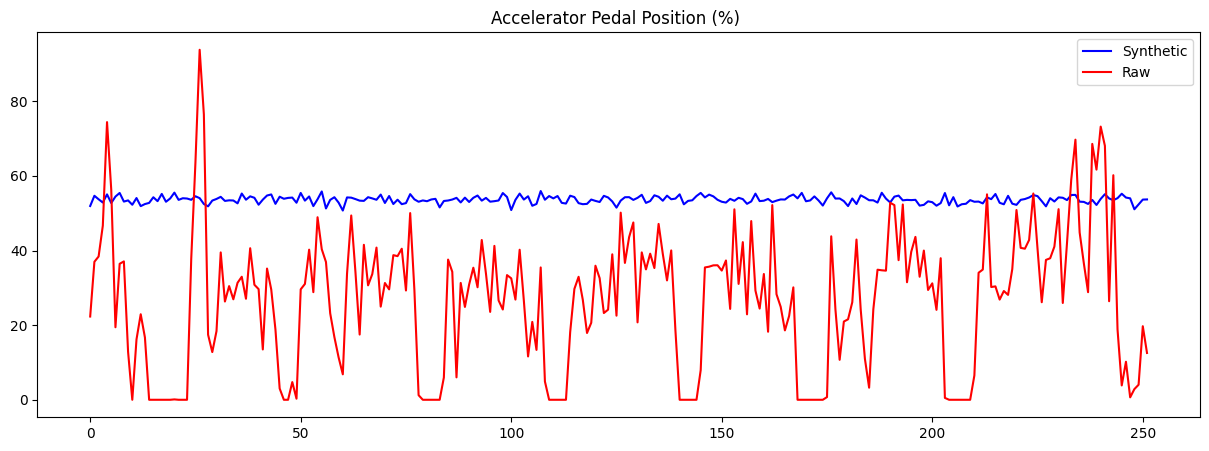

In [21]:
w=500       #comparison with weibull_min
plt.figure(figsize=(15,5))
v1 = samples2.rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()

In [22]:
df['61443-91'].value_counts()[0.0]  #appx 50% of the values are 0

63886

In [23]:
sample_df = pd.DataFrame(np.zeros(len(df['61443-91'])), columns=['61443-91'])
sample_df

,61443-91
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
126724,0.0
126725,0.0
126726,0.0
126727,0.0


In [30]:
from scipy.stats import expon
rate = 0.4  # rate parameter (λ) for the exponential distribution
loc = 53.22218226373661  # location parameter (optional)

# Create an exponential distribution object with specified parameters
exponential_dist = expon(scale=1/rate, loc=loc)

for index, rows in sample_df.iterrows():
    if(random.random() >= 0.5):
        sample_df.loc[index][0] = exponential_dist.rvs().round(1)

In [31]:
sample_df.head()

,61443-91
0,2.5
1,58.2
2,57.1
3,95.2
4,0.0


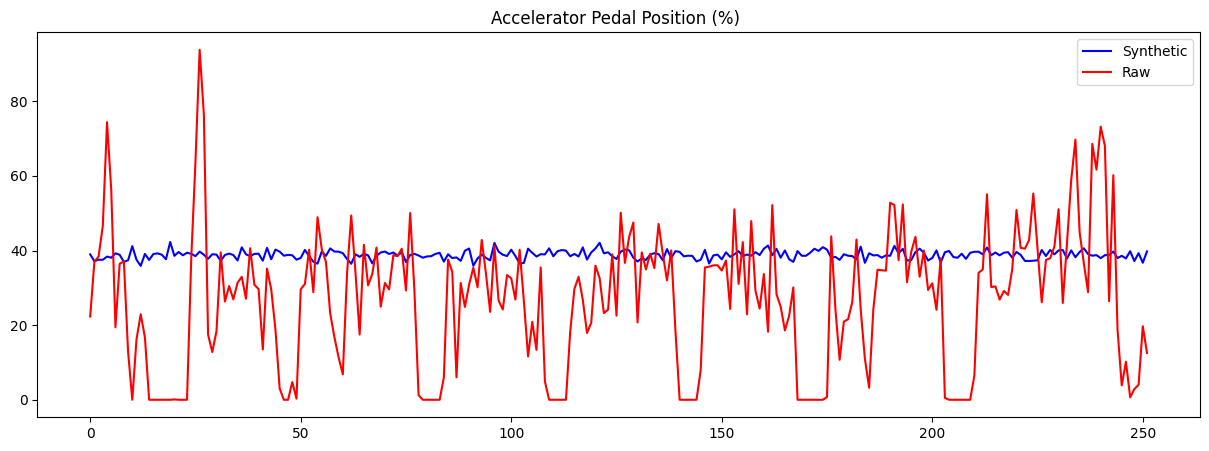

In [32]:
w=500       #comparison with hypsecant
plt.figure(figsize=(15,5))
v1 = sample_df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
v2 = df['61443-91'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df)/w))]]/w
plt.title('Accelerator Pedal Position (%) ')
plt.plot(np.arange(len(v1)),v1, c='b', label='Synthetic')
plt.plot(np.arange(len(v1)),v2, c='r', label = 'Raw')
plt.legend()